### Прогноз цен на авиабилеты

Авиакомпания — это компания, предоставляющая услуги воздушных перевозок пассажиров и грузов. Авиакомпании используют самолеты для предоставления этих услуг и могут заключать партнерские соглашения или альянсы с другими авиакомпаниями в рамках соглашений о код-шеринге, согласно которым они обе предлагают и выполняют один и тот же рейс. Как правило, авиакомпании признаются на основании сертификата или лицензии на осуществление воздушных перевозок, выданной государственным авиационным органом. Авиакомпании могут быть регулярными или чартерными операторами.

Авиакомпании устанавливают цены на свои услуги, стремясь максимизировать прибыль. Ценообразование авиабилетов с годами стало значительно сложнее и в настоящее время в значительной степени определяется компьютеризированными системами управления доходностью.

Цена авиабилета зависит от ряда факторов, таких как продолжительность полета, количество дней до вылета, время прибытия и отправления и т. д. Авиакомпании могут снижать стоимость в моменты, когда им необходимо нарастить спрос, и в моменты, когда билеты менее доступны. Они также могут максимизировать затраты. Цена может зависеть от различных факторов. Каждый фактор имеет свои собственные правила и алгоритмы для установления соответствующей цены. Последние достижения в области искусственного интеллекта (ИИ) и машинного обучения (МО) позволяют выводить такие правила и моделировать изменение цены.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [2]:
df = pd.read_csv("Clean_Dataset.csv", index_col=0)

In [3]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Описание набора данных

* **Airline** (Авиакомпания): Название авиакомпании хранится в столбце «Авиакомпания». Это категория, включающая 6 различных авиакомпаний.
* **Flight** (Рейс): Flight хранит информацию о коде рейса самолета. Это категориальный признак.
* **Source City** (Город-источник): Город, из которого вылетает самолет. Это категория, включающая 6 уникальных городов.
* **Departure Time** (Время отправления): это производная категориальная характеристика, полученная путем группировки временных периодов в интервалы. Она хранит информацию о времени отправления и имеет 6 уникальных временных меток.
* **Stops** (Остановки):Категориальный признак с тремя различными значениями, хранящий количество остановок между городами отправления и назначения.
* **Arrival Time** (Время прибытия): это производная категориальная характеристика, созданная путем группировки временных интервалов в интервалы. Она имеет шесть различных временных меток и содержит информацию о времени прибытия.
* **Destination City** (Город назначения): Город, где приземлится самолет. Это категория, включающая 6 уникальных городов.
* **Class** (Класс): Категориальный признак, содержащий информацию о классе места; имеет два различных значения: Бизнес и Эконом.
* **Duration** (Продолжительность): Непрерывный параметр, отображающий общее время, необходимое для поездки между городами в часах.
* **Days Left** (Осталось дней): это производная характеристика, которая рассчитывается путем вычитания даты поездки из даты бронирования.
* **Price** (Цена): Целевая переменная хранит информацию о цене билета.
не билета.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


Пустых значений нет.

In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
df.describe(include='O')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


## Разведочный анализ данных (РАД, EDA)

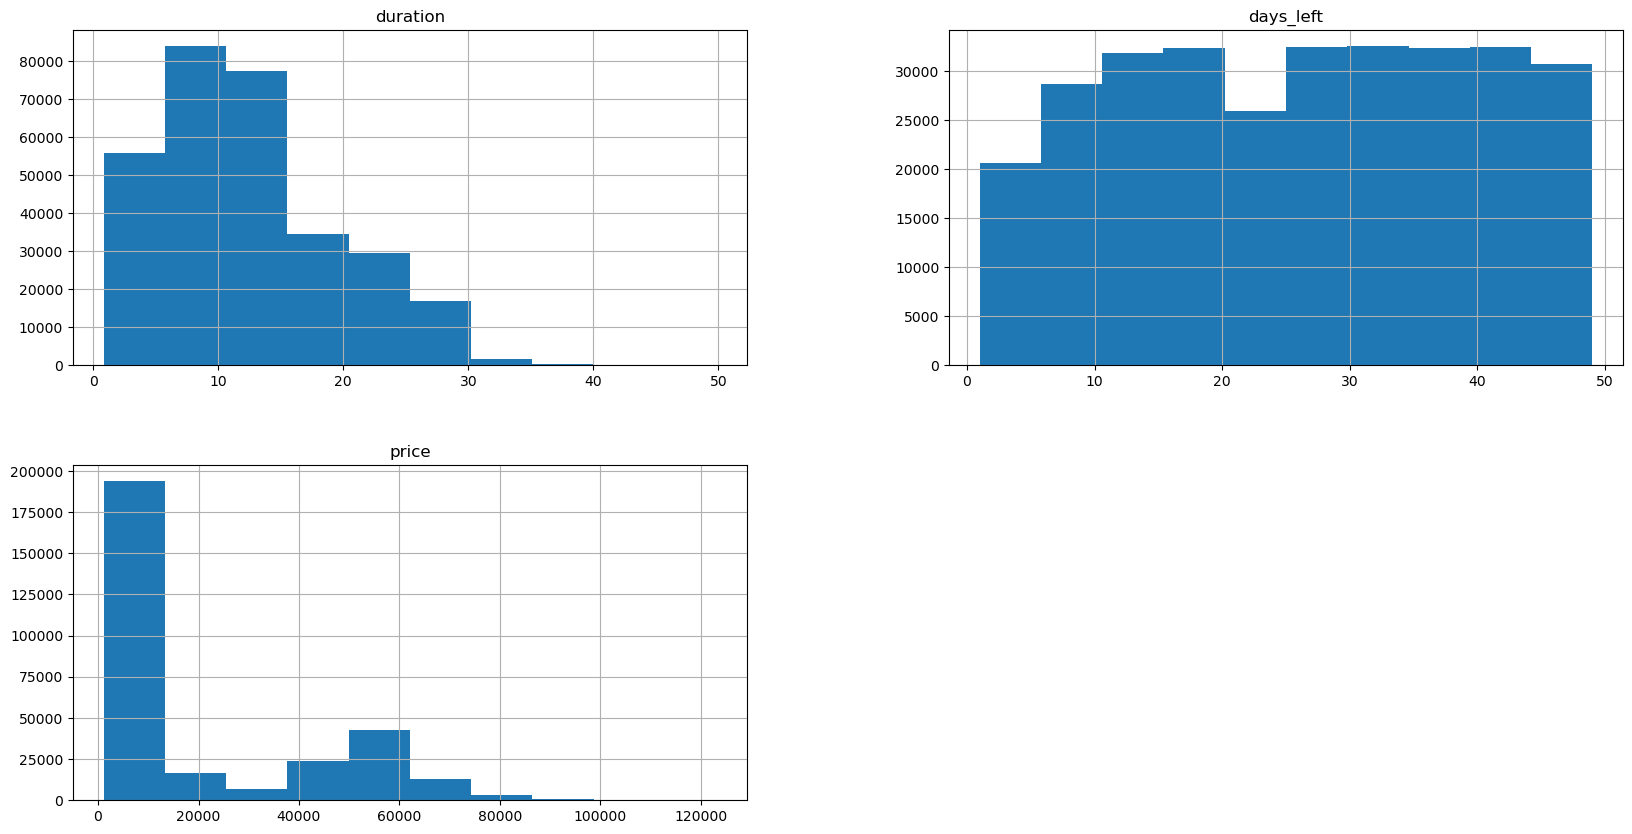

In [7]:
df.hist(figsize=(20,10));

In [8]:
cat_features = [column for column in df.columns if df[column].dtype =="object"]

In [9]:
cat_features

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

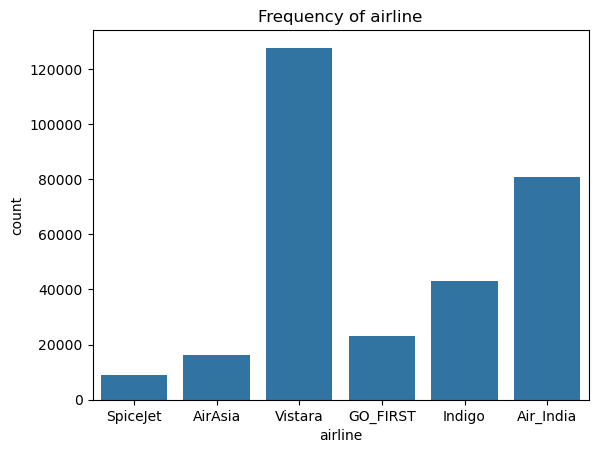

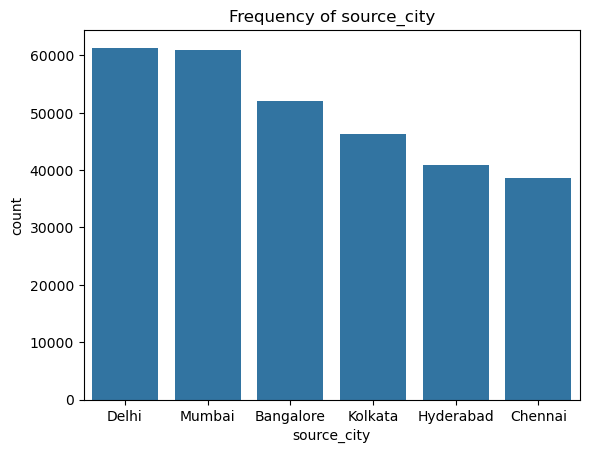

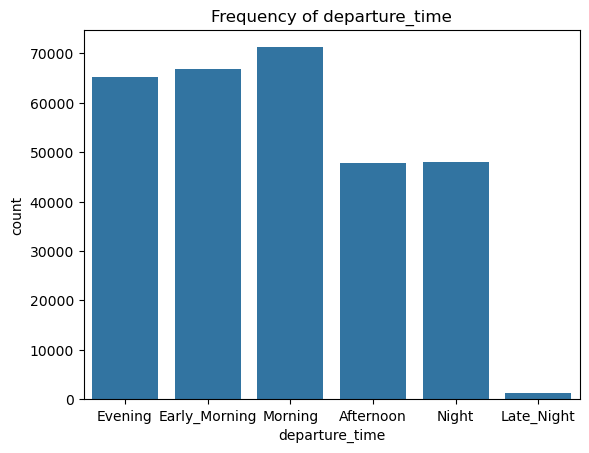

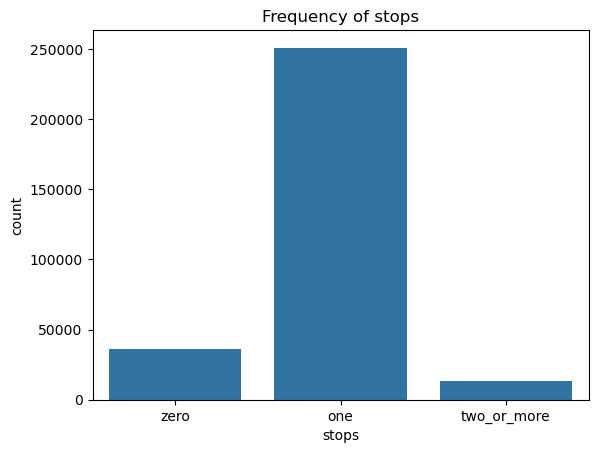

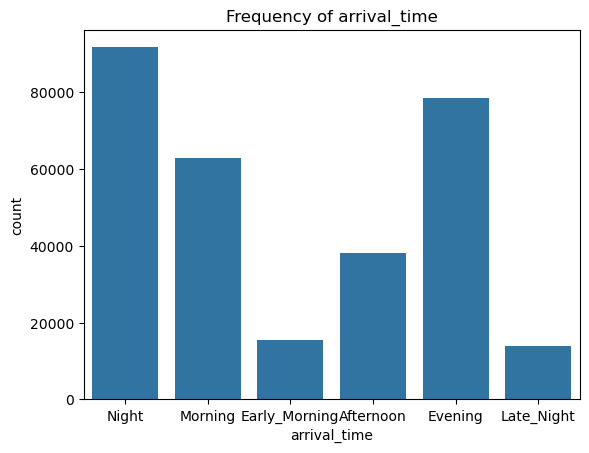

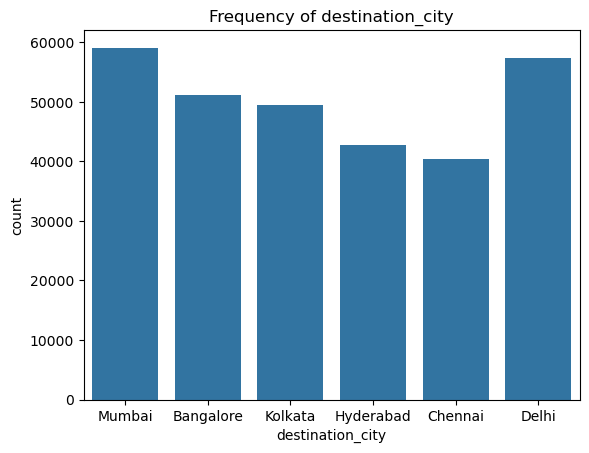

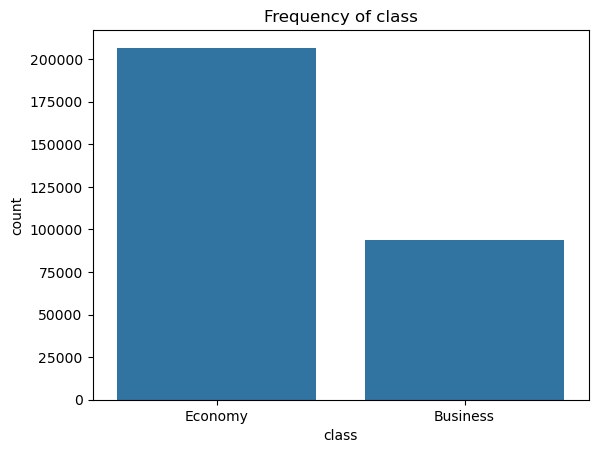

In [10]:
for column in cat_features:
    if column != 'flight':
        sns.countplot(x=df[column], data=df)
        plt.title("Frequency of " + column)
        plt.show()

In [11]:
df[df['flight']=='SG-8709']

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
274,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,3,6060
398,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,4,5953
564,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5,5953
739,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,6,5953
...,...,...,...,...,...,...,...,...,...,...,...
42049,SpiceJet,SG-8709,Delhi,Evening,one,Early_Morning,Chennai,Economy,13.08,43,4942
42053,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,26.42,43,4942
42228,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,26.83,44,4942
42381,SpiceJet,SG-8709,Delhi,Evening,one,Night,Chennai,Economy,27.00,45,4942


In [12]:
df[df['flight']=='SG-8709'].head(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
274,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,3,6060
398,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,4,5953
564,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,5,5953
739,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,6,5953
919,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,7,5953
1105,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,8,5953
1331,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,9,6060
1493,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,10,6270
1644,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,11,5953


In [13]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

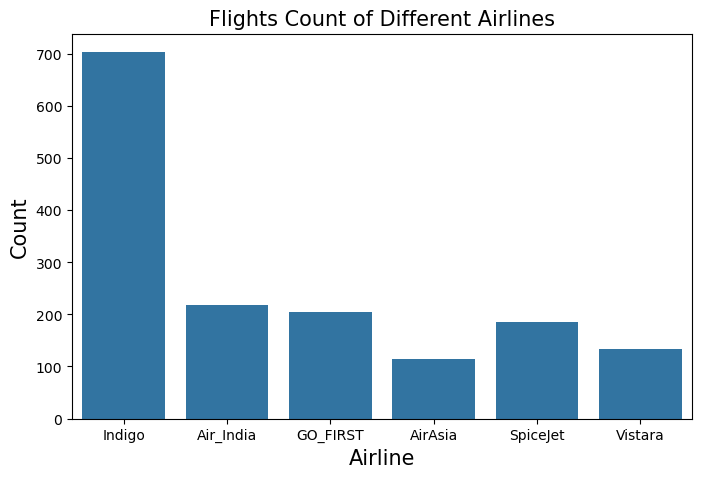

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x=df1['airline'])
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Индиго одна из самых популярных авиакомпаний.

In [15]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

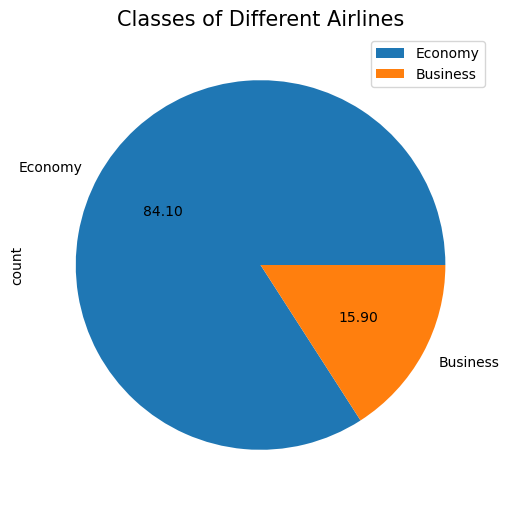

In [16]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

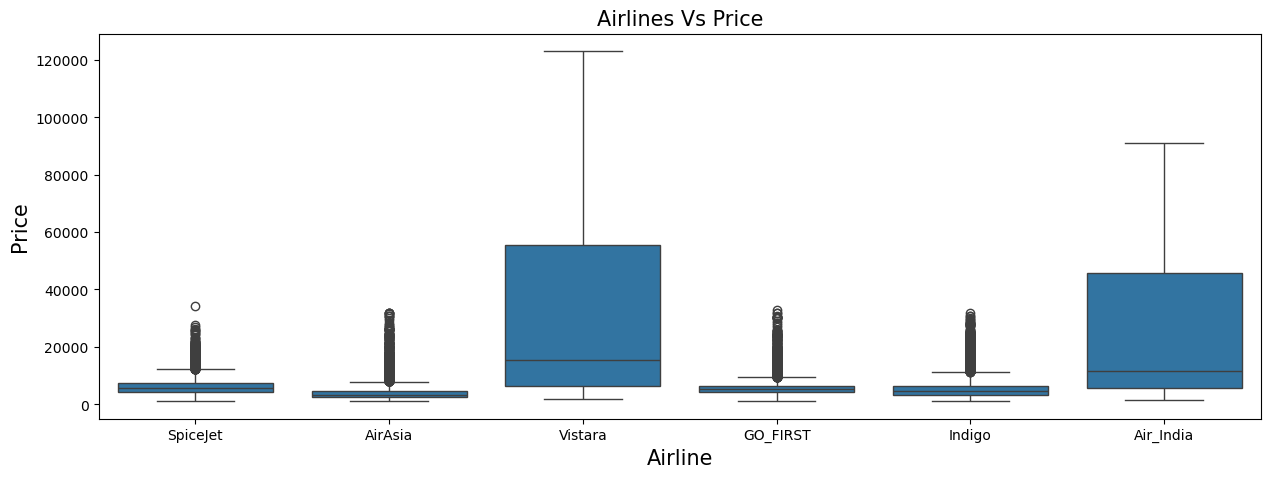

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Авиакомпании Vistara и Air India предлагают самые высокие цены по сравнению с другими. У SpiceJet, AirAsia, GO_First и Indigo цены примерно одинаковые.

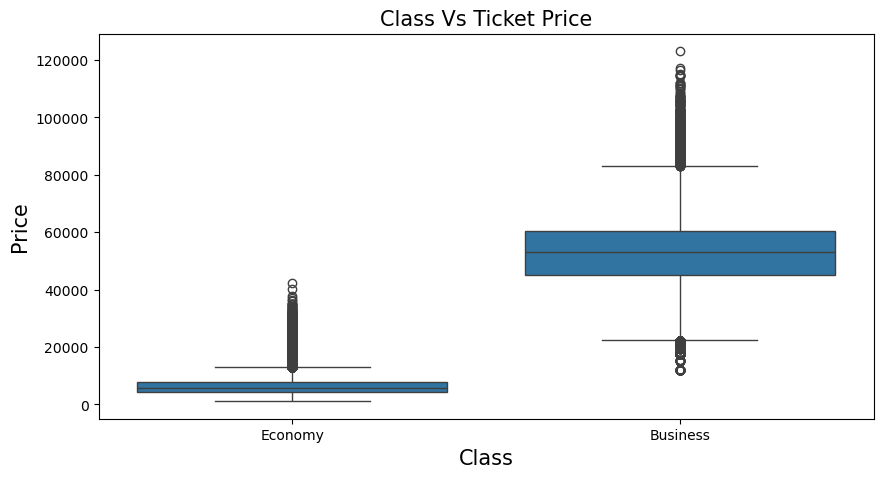

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df)
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Цена билета в бизнес-классе выше, чем в эконом-классе.

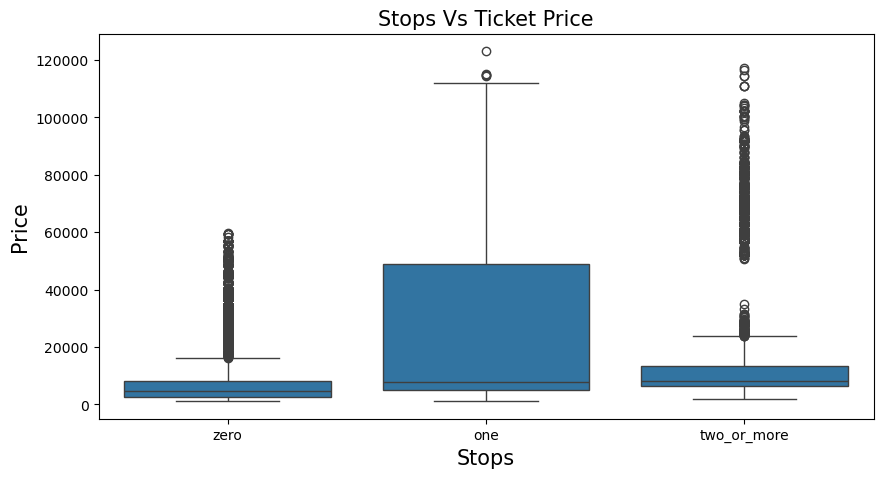

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df)
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

На рейсах с одной пересадкой действует максимальная цена билета.

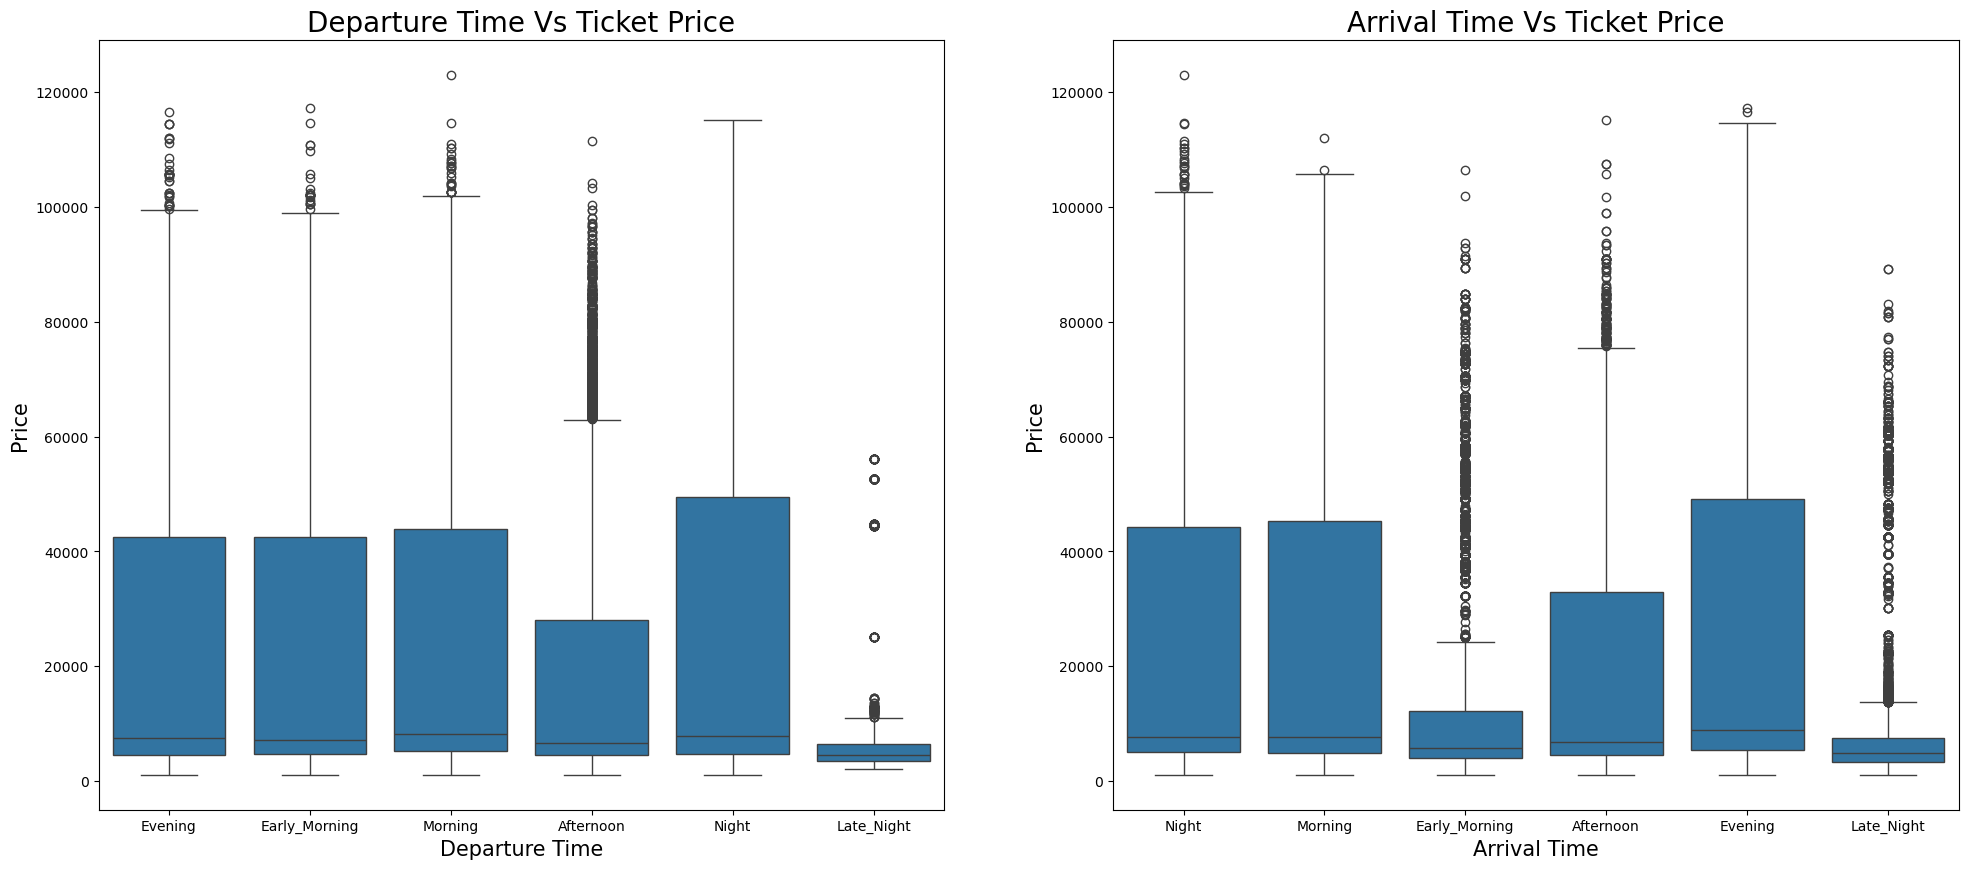

In [20]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df)
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Стоимость билетов на рейсы, вылетающие ночью, выше.
Стоимость билетов практически одинакова для рейсов с вылетом рано утром, утром и вечером.
Низкие цены на билеты на рейсы с поздним ночным вылетом.

Стоимость билетов на рейсы с прибытием вечером выше.
Стоимость билетов практически одинакова для рейсов, прибывающих утром и вечером.
Стоимость билетов низкая на рейсы с поздним ночным временем прибытия, совпадающим со временем отправления.

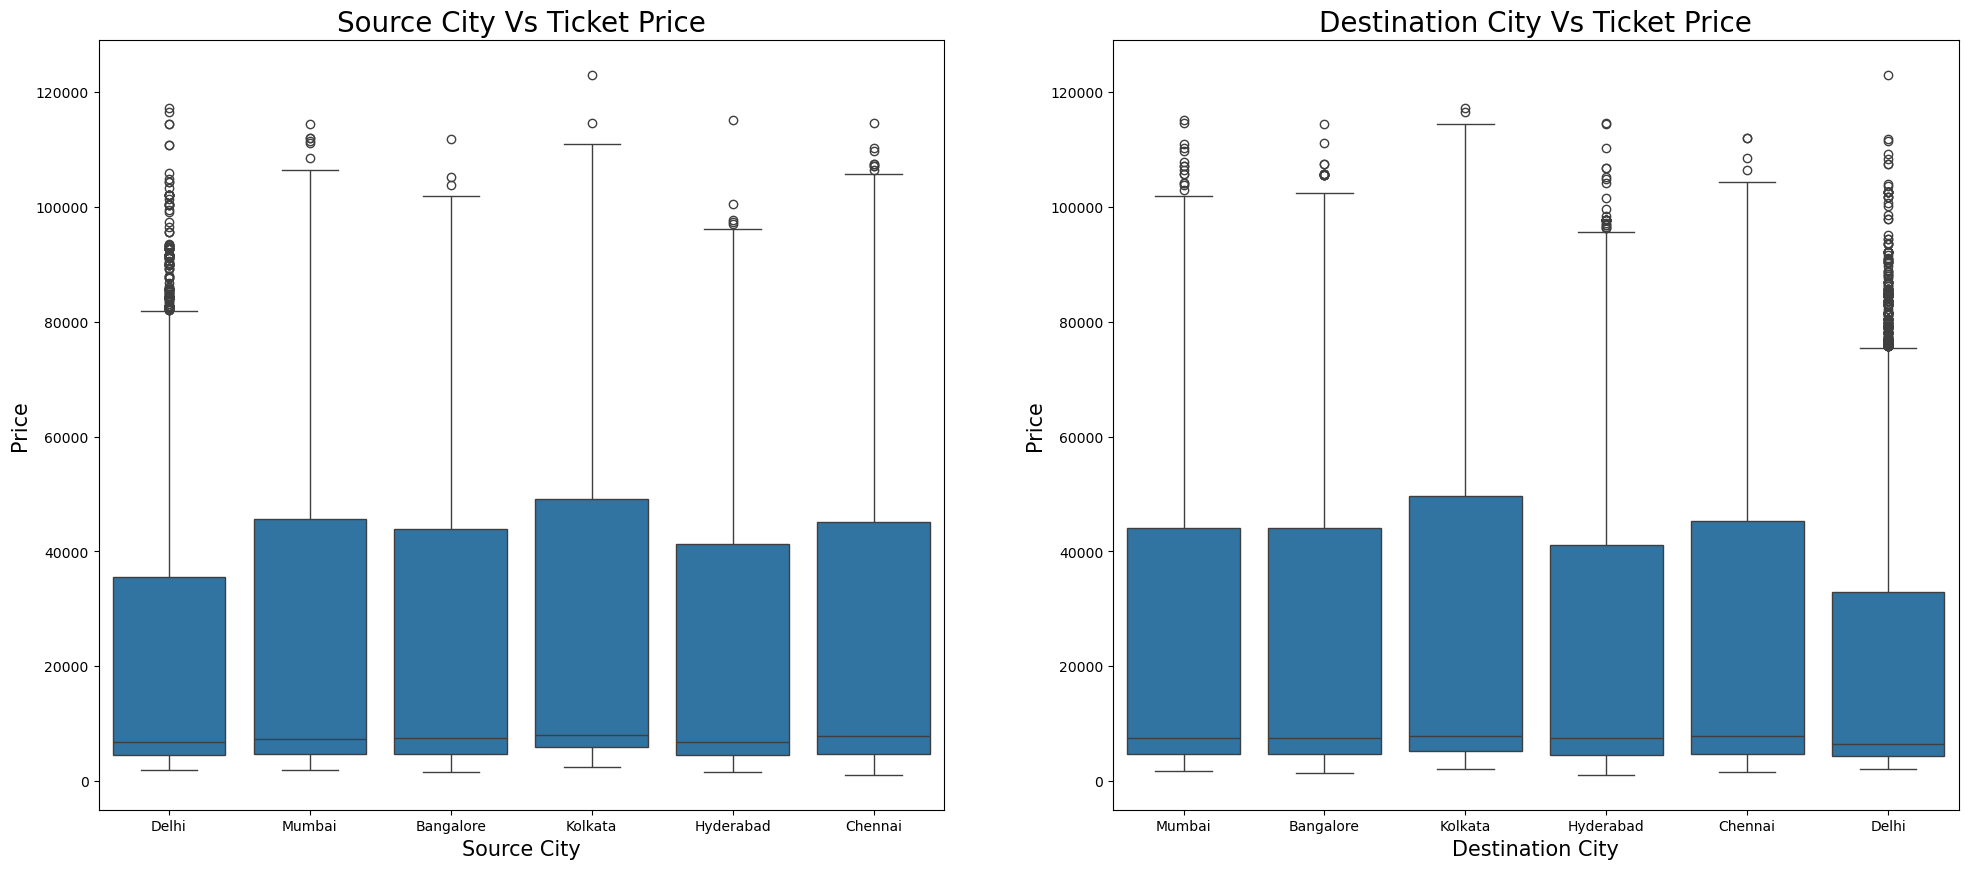

In [21]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df)
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Цена билетов выше на рейсы, вылетающие из Калькутты.
Стоимость билетов практически одинакова для рейсов из таких городов, как Мумбаи и Ченнаи, Хайдарабад и Бангалор.
Цены на билеты на рейсы из Дели низкие.

Стоимость билетов выше на рейсы, пункты назначения которых — Калькутта и Ченнай.
Стоимость билетов на рейсы в такие города, как Мумбай и Бангалор, практически одинакова.
Цены на билеты на рейсы с городом назначения, таким как Дели, низкие.

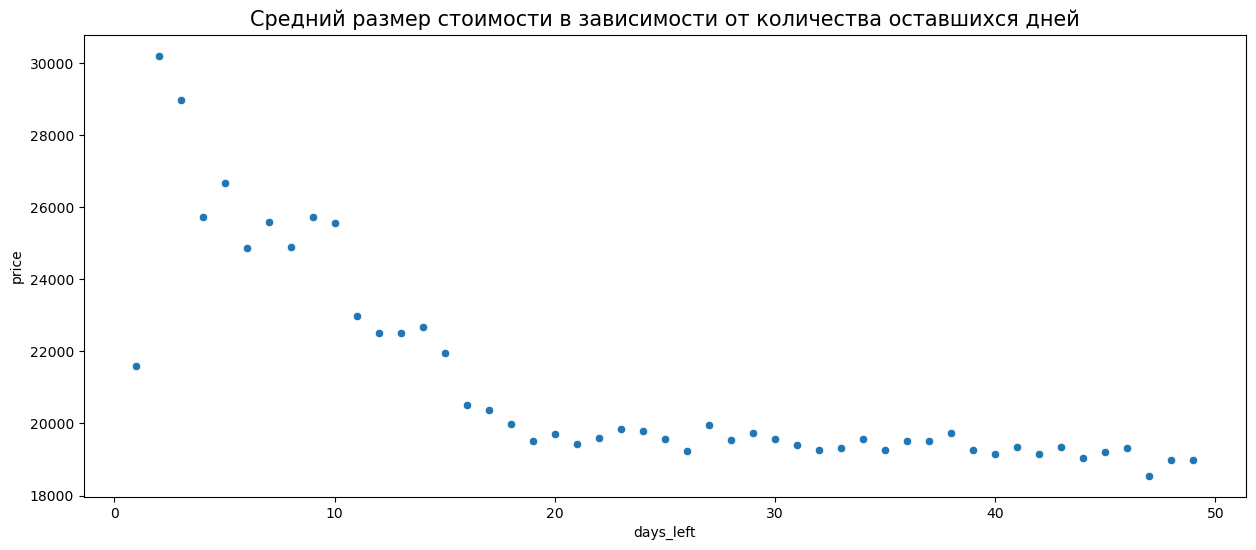

In [22]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Средний размер стоимости в зависимости от количества оставшихся дней",fontsize=15)

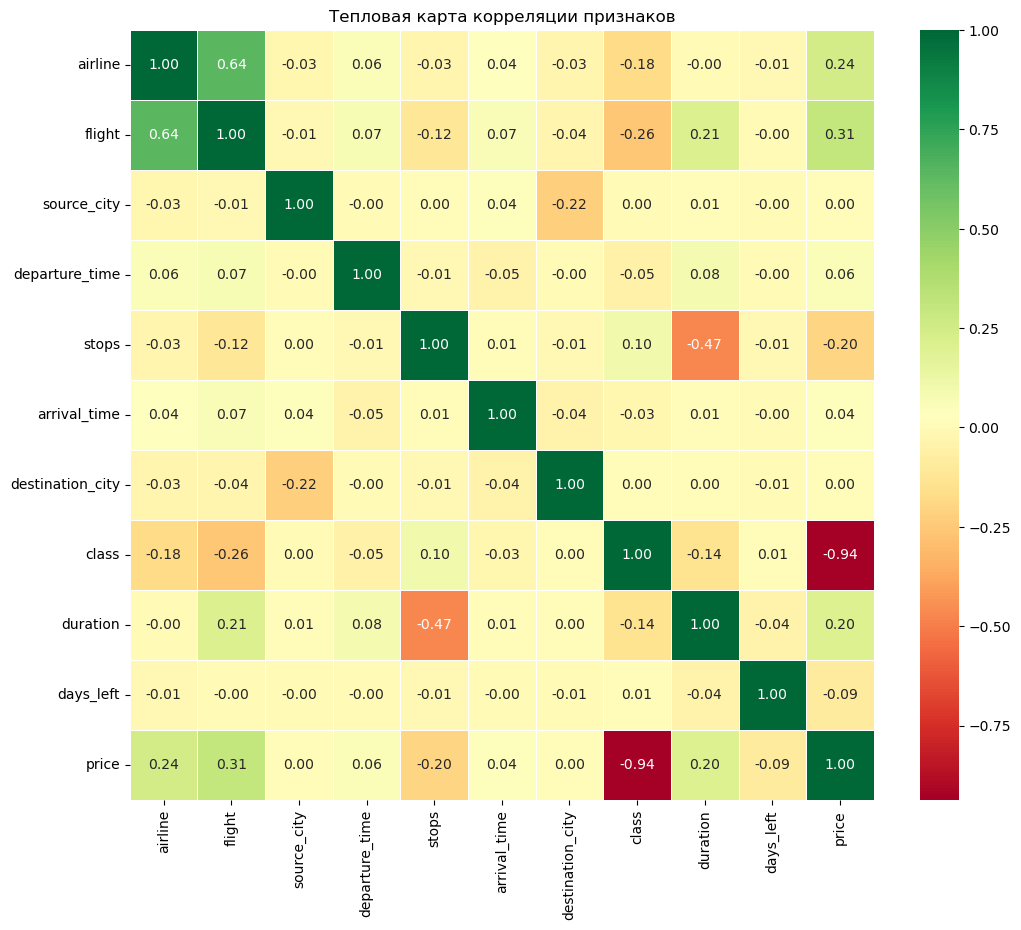

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 
           'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']
df_encoded = df.copy()
le = LabelEncoder()

categorical_cols = df_encoded.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)

plt.title('Тепловая карта корреляции признаков')
plt.show()

По тепловой карте можно увидеть такие завсисмости целевой переменной с авиакомпанией(0.24), по другим графикам как раз было видно, что у некоторых авиакомпаний билеты дороже; с кодом рейса самолета (0.31); обратная зависимость видна с классом обслуживания (-0.94) и с остановками (-0.20), так же с длительностью полета (0.20) .

По мимо целевой переменной имеются зависимости у авиакомпании с кодом самолета(0.64) , это понятно тк у авиакомпаний собственные определенные самолеты, обратная корелляция у количества остановок и длительностью полета(-0.47)

C:\Users\User\AppData\Local\Temp\ipykernel_17048\2788125279.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class_numeric', y='price', data=df, ci=None)


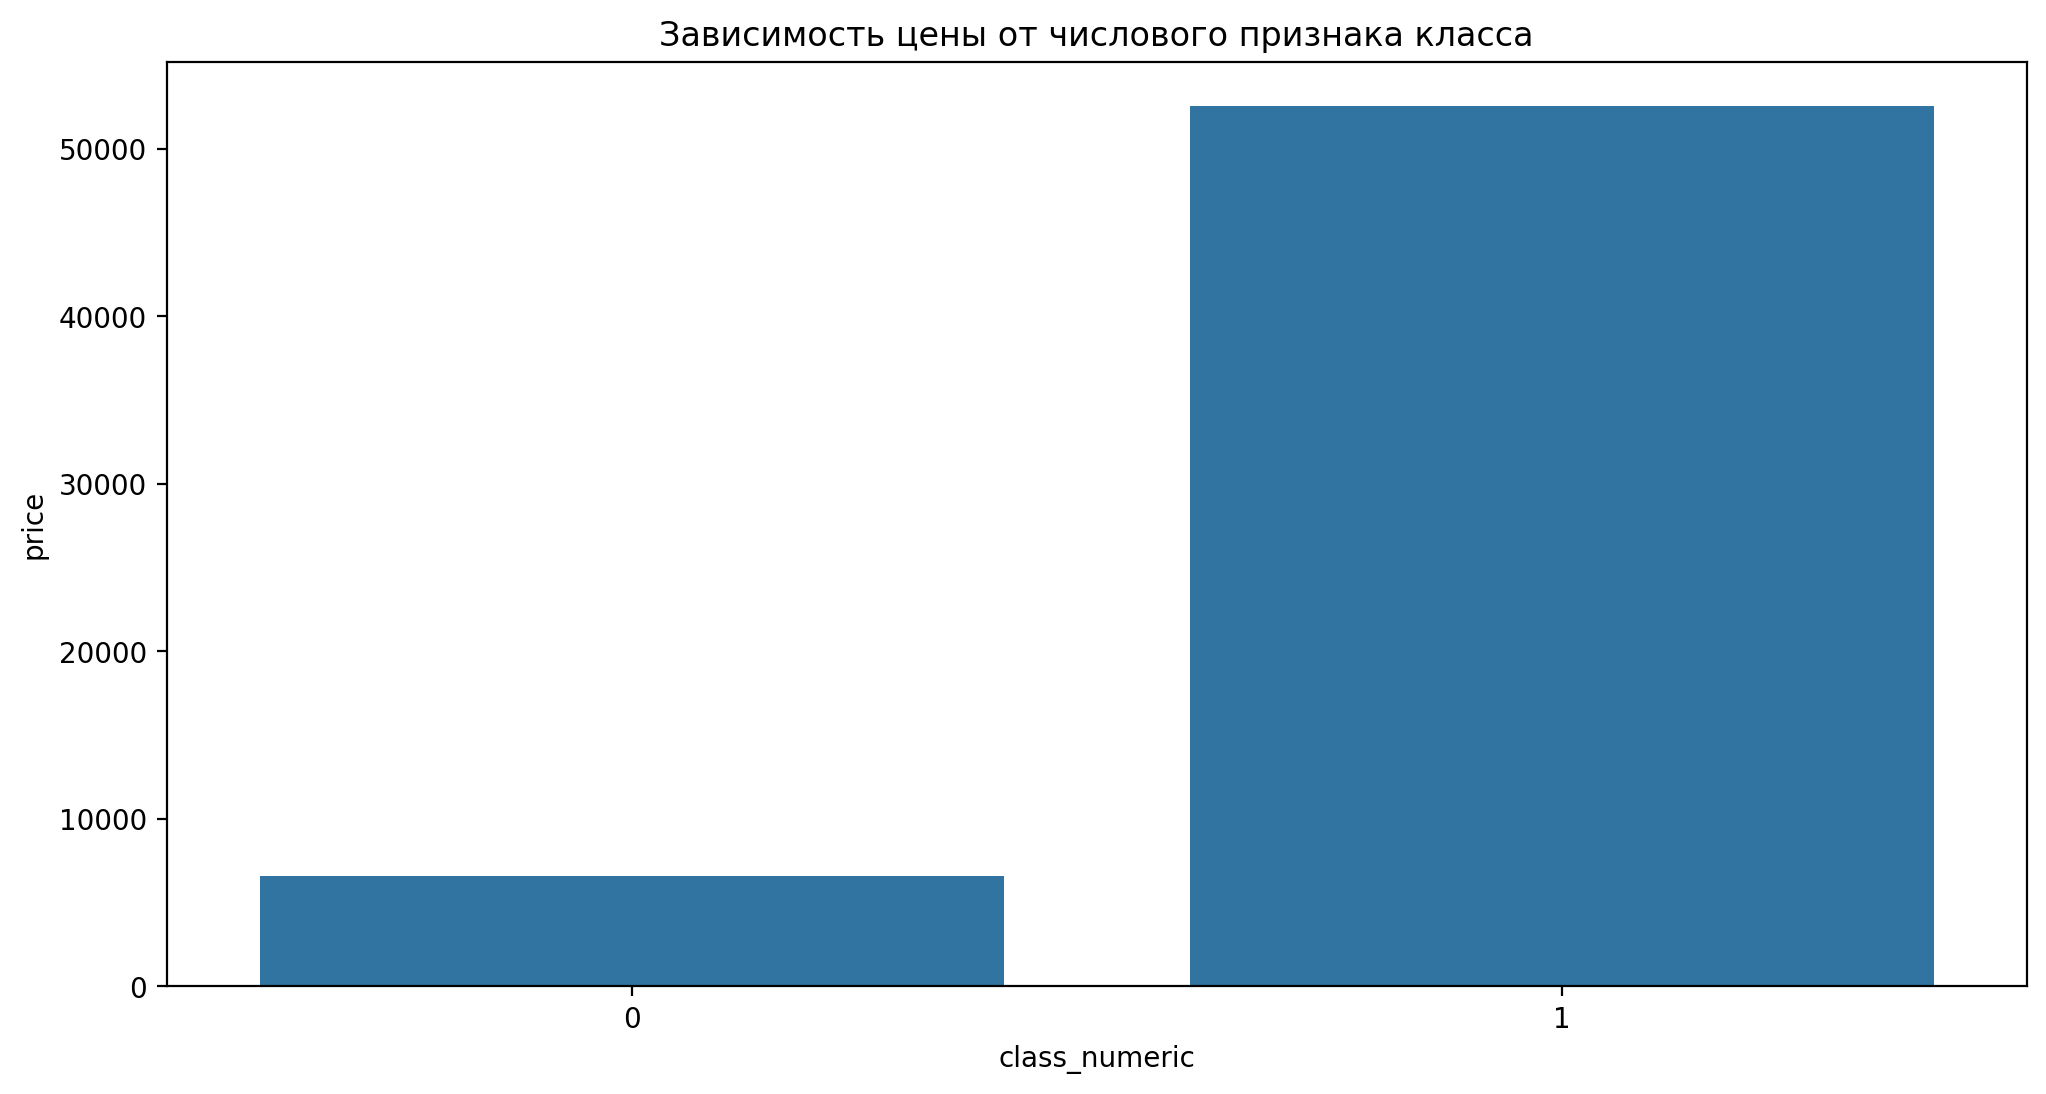

In [24]:

class_map = {'Economy': 0, 'Business': 1}
df['class_numeric'] = df['class'].map(class_map)

plt.figure(figsize=(12, 6), dpi=200)
sns.barplot(x='class_numeric', y='price', data=df, ci=None)
plt.title('Зависимость цены от числового признака класса')
plt.show()

Билеты бизнесс класса гораздо дороже, чем эконома, от сюда большая зависимость.

C:\Users\User\AppData\Local\Temp\ipykernel_17048\1749215219.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='stops_numeric', y='price', data=df, ci=None)


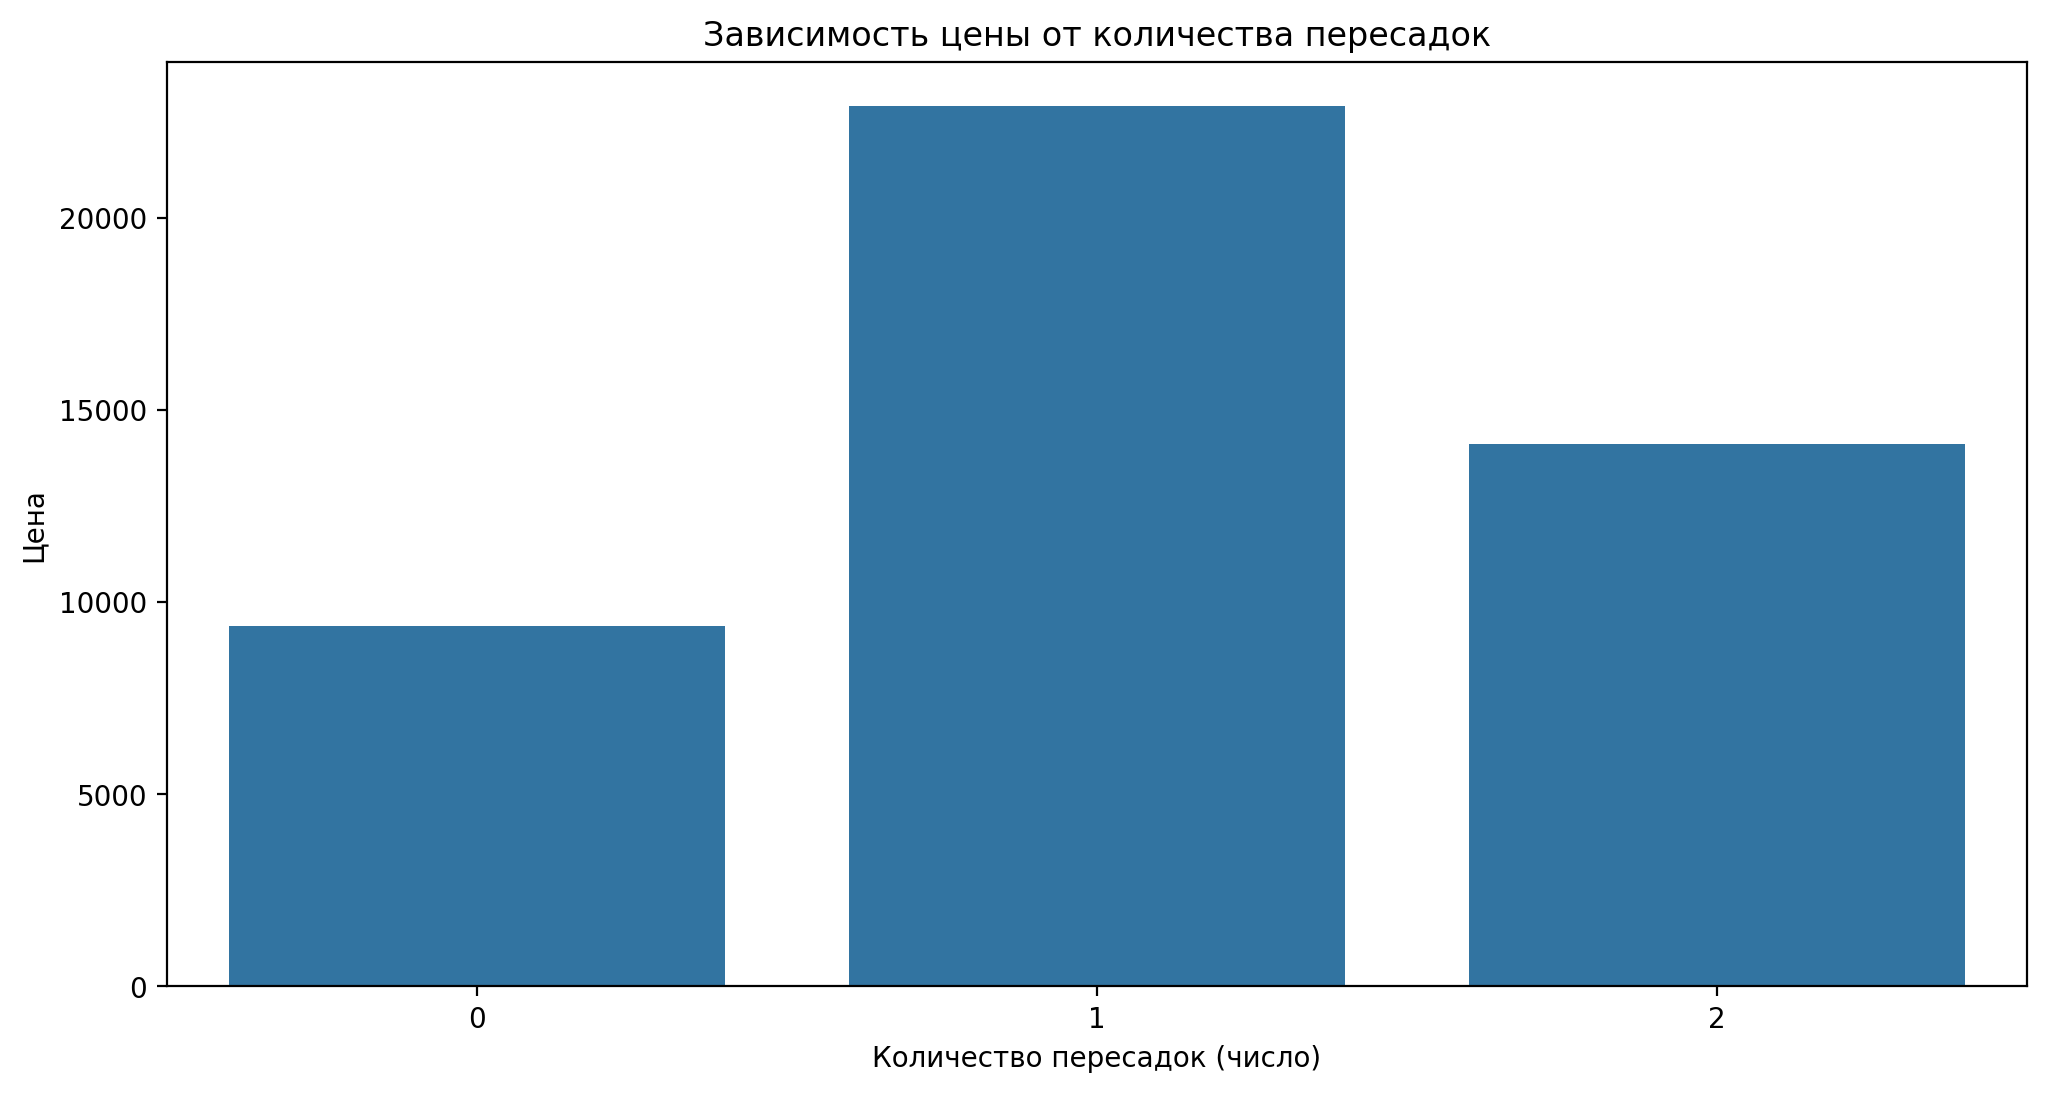

In [25]:
stops_map = {
    'zero': 0,
    'one': 1,
    'two_or_more': 2 
}

df['stops_numeric'] = df['stops'].map(stops_map)


plt.figure(figsize=(12, 6), dpi=200)
sns.barplot(x='stops_numeric', y='price', data=df, ci=None)

plt.title('Зависимость цены от количества пересадок')
plt.xlabel('Количество пересадок (число)')
plt.ylabel('Цена')
plt.show()

Дороже всего рейсы с 1 пересадкой.

C:\Users\User\AppData\Local\Temp\ipykernel_17048\760013187.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='airline_numeric', y='price', data=df, ci=None, palette='magma')
C:\Users\User\AppData\Local\Temp\ipykernel_17048\760013187.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline_numeric', y='price', data=df, ci=None, palette='magma')


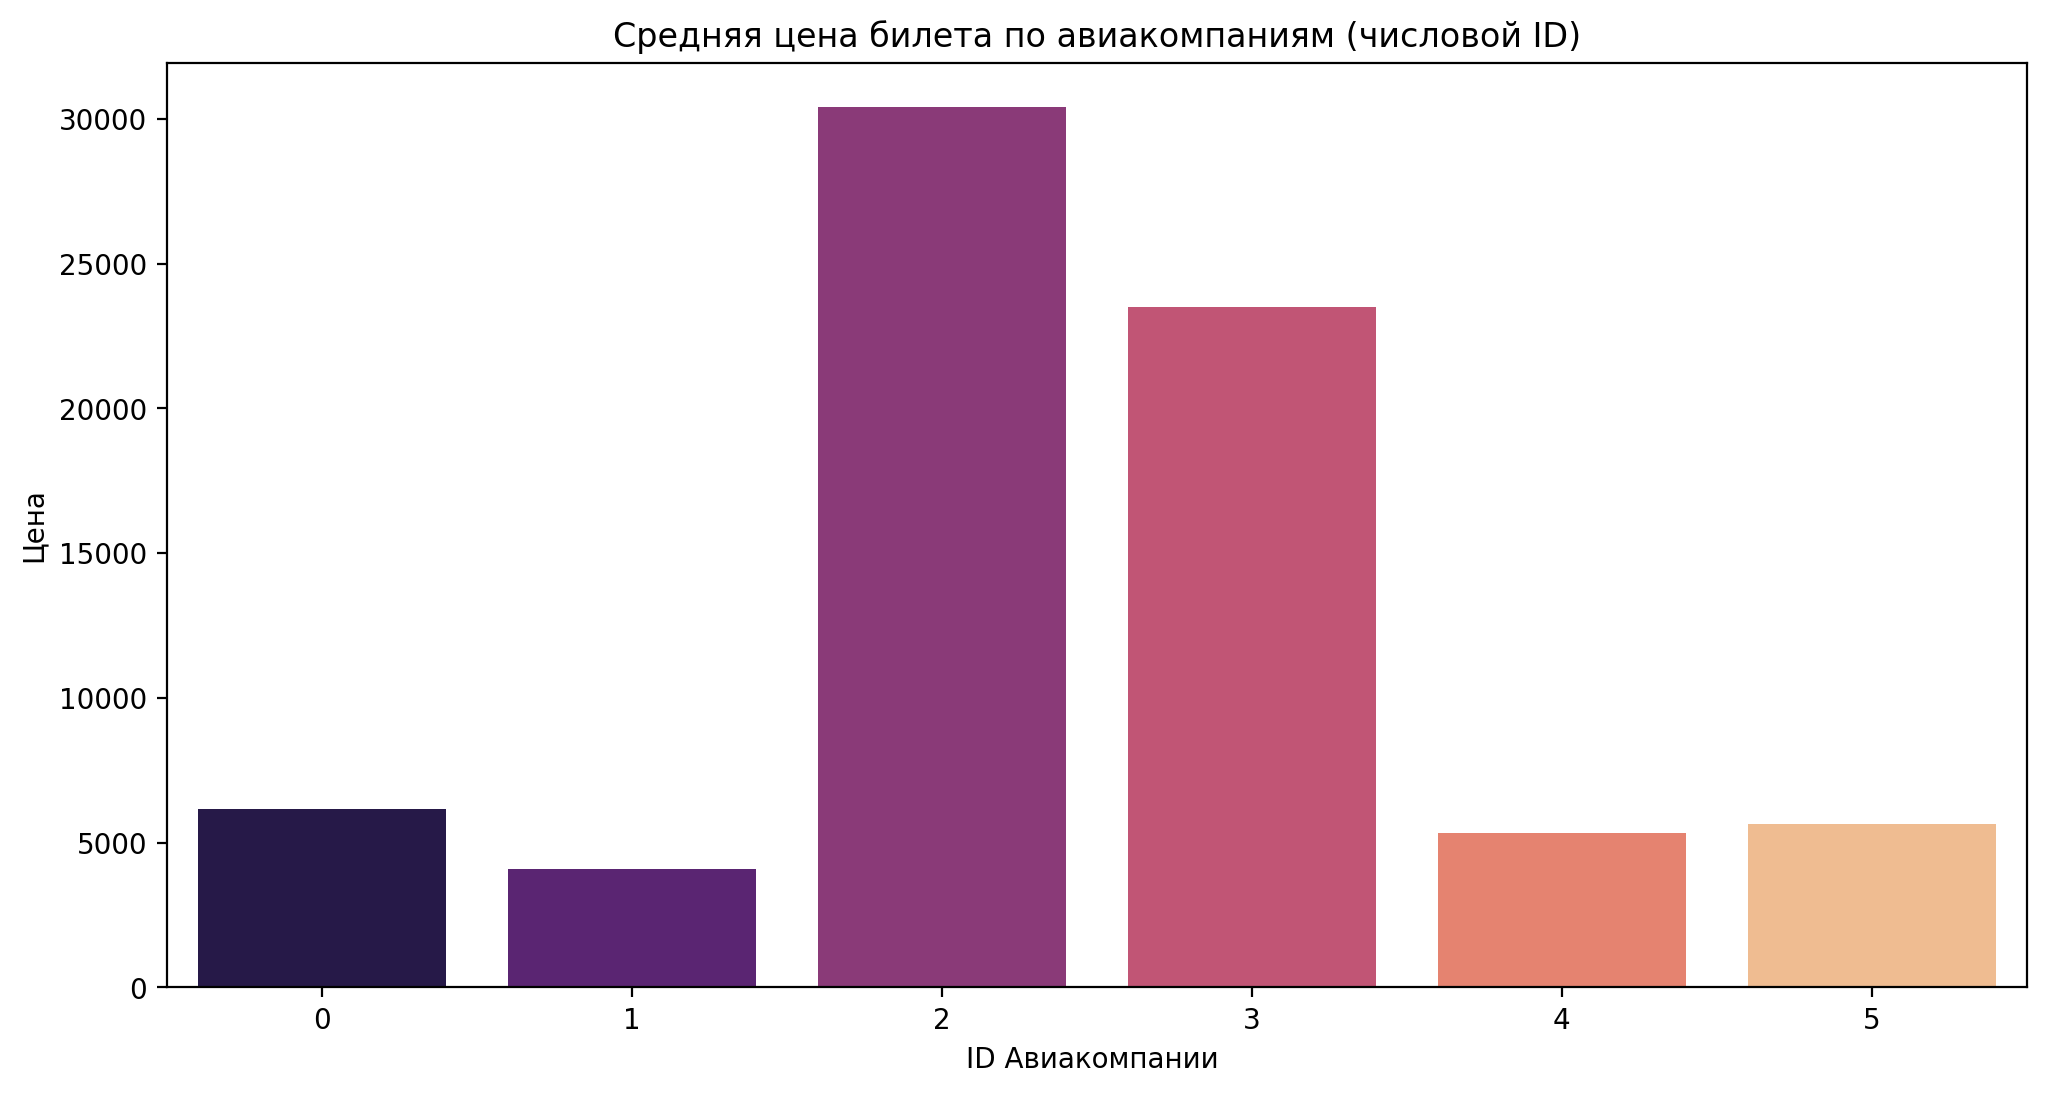

In [26]:

airline_map = {
    'SpiceJet': 0,
    'AirAsia': 1,
    'Vistara': 2,
    'Air_India': 3,
    'Indigo': 4,
    'GO_FIRST': 5
}

df['airline_numeric'] = df['airline'].map(airline_map)

plt.figure(figsize=(12, 6), dpi=200)
sns.barplot(x='airline_numeric', y='price', data=df, ci=None, palette='magma')

plt.title('Средняя цена билета по авиакомпаниям (числовой ID)')
plt.xlabel('ID Авиакомпании ')
plt.ylabel('Цена')
plt.show()

Дороже всего билеты у авиакомпании Vistara

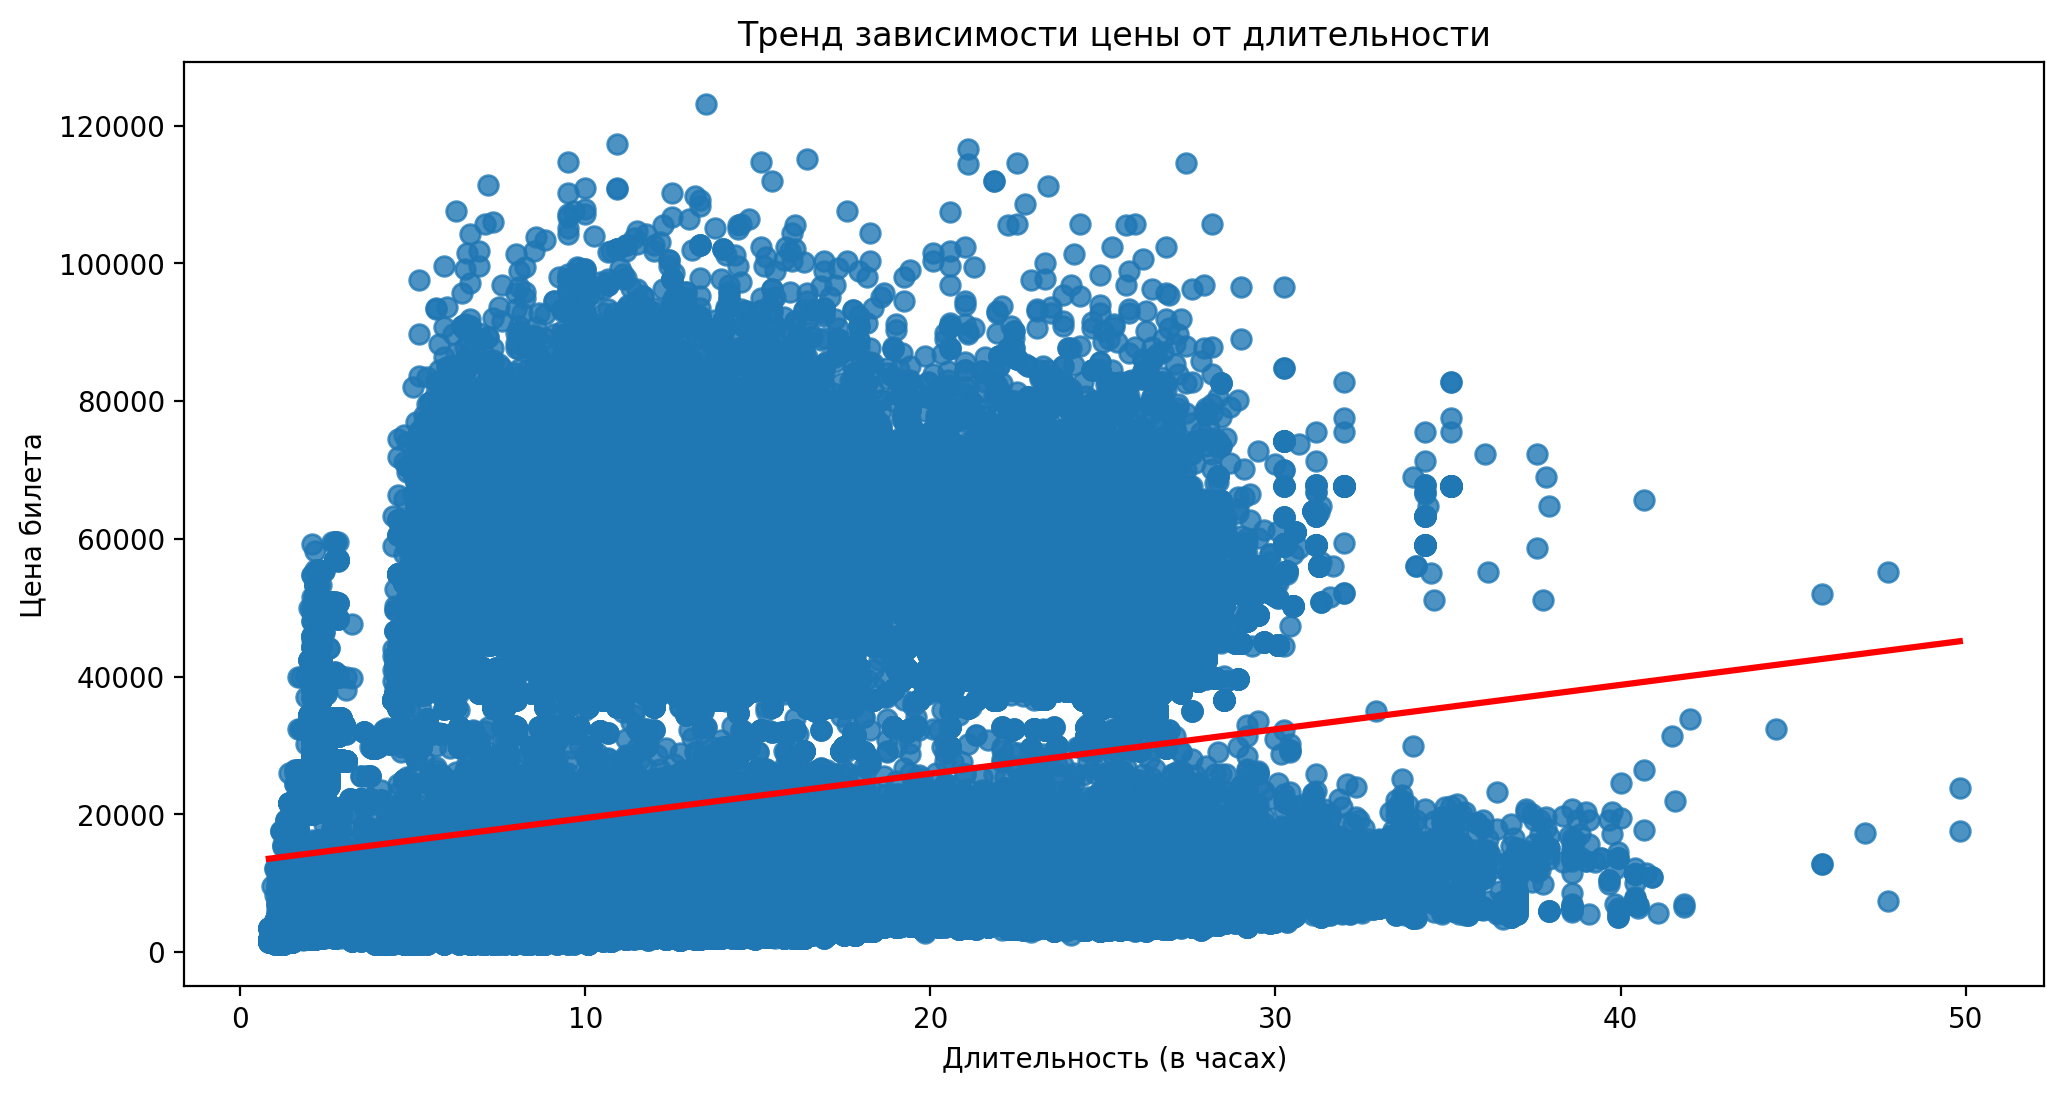

In [27]:
plt.figure(figsize=(12, 6), dpi=200)
sns.regplot(x='duration', y='price', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})

plt.title('Тренд зависимости цены от длительности')
plt.xlabel('Длительность (в часах)')
plt.ylabel('Цена билета')
plt.show()

С увеличением длительности полета растет цена полета.

### Обучение модели линейной регрессии


In [28]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'class_numeric', 'stops_numeric', 'airline_numeric'],
      dtype='object')

Для обучения модели я буду брать признаки с большими завивимсотями, которые я выявила ренее, единственное исключу из них код самолета, тк там много уникальных значений, которые модель может просто "заучить" и это приведет к перобучению.

In [29]:

df_ml = df.copy()
stops_map = {'zero': 0, 'one': 1, 'two_or_more': 2}
class_map = {'Economy': 0, 'Business': 1}

df_ml['stops'] = df_ml['stops'].map(stops_map)
df_ml['class'] = df_ml['class'].map(class_map)

le = LabelEncoder()
cat_features = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time']

for col in cat_features:
    df_ml[col] = le.fit_transform(df_ml[col])
X = df_ml[['airline', 'source_city', 'departure_time', 'stops', 
           'arrival_time', 'destination_city', 'class', 
           'duration', 'days_left']]

Далее нужные категориальные признаки перевожу в числовые.

Целевая переменная:

In [30]:
y = df["price"]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Делим данные на тестовые и тренировочные.

## Линейная регрессия

In [32]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [33]:
lrm.intercept_

np.float64(-761.222771699373)

In [34]:
lrm.coef_

array([  960.61597969,   116.55039202,    87.72549575,  6132.79611995,
         162.99950389,   162.52120003, 45061.28879767,    73.40747169,
        -129.09116331])

In [35]:
predictions = lrm.predict(X_test)
predictions

array([ 4015.42743268, 52980.41570292,  7284.79507442, ...,
       -1670.0267026 ,  5593.58255497, -3489.49067397])

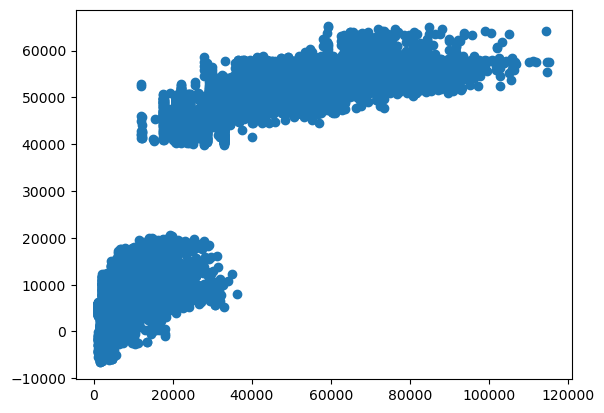

In [36]:
plt.scatter(y_test, predictions)

<Axes: xlabel='price'>

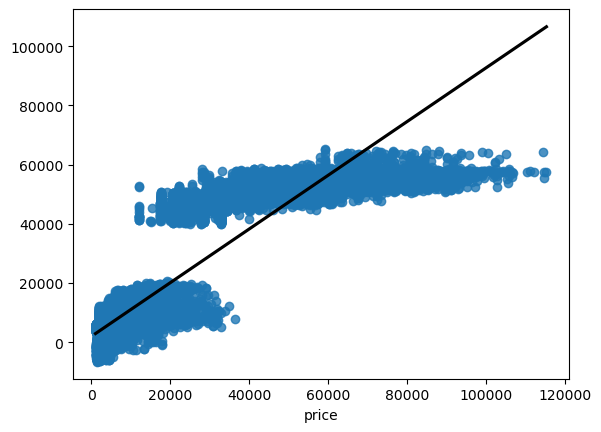

In [37]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

In [38]:

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [39]:
from sklearn import metrics
print('R2 Score:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

R2 Score: 0.9064210845100285
MAE: 4531.822371866815


In [40]:
def print_metrics(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print(f'R2 Square {r2_square:.2f}')
train_pred = lrm.predict(X_train)
test_pred = lrm.predict(X_test)
print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

Test:
_____________________________________
MAE: 4531.822371866815
MSE: 48161933.070596404
RMSE: 6939.879903182505
R2 Square 0.91

Train:
_____________________________________
MAE: 4556.562855663848
MSE: 48271340.70910909
RMSE: 6947.757962761015
R2 Square 0.91


Итог: очень высокая точность (0.906), но средняя ошибка тоже довольно большая 4531, возможно для бизнес билетов, она не такая заметная, но вот для эконом класса, она может быть критичной. По графику можно увидеть что линия пытается пройти посередине между бизнес и эконом классами, чего она сделать не может, из-за чего завышает цены для дешевых билетов и занижает для дорогих.

In [41]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

### KNeighborsRegressor

In [42]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [43]:
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

In [44]:
print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

Test:
_____________________________________
MAE: 8804.259813872908
MSE: 160356853.17184195
RMSE: 12663.208644409282
R2 Square 0.69

Train:
_____________________________________
MAE: 6801.355514095199
MSE: 99969312.24527371
RMSE: 9998.465494528333
R2 Square 0.81


In [45]:
results_df2 = pd.DataFrame(data=[["KNeighborsRegressor", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df  = pd.concat([results_df, results_df2], ignore_index=True)

Эта модель представляет результаты хуже чем предыдущая, особенно на тестовых данных. В среднем модель ошибается на 8804 единицы в каждом предсказании. Что тоже выше, чем в предыдущей модели. В любом случае, модель KNeighborsRegressor нуждается в масштабировании, так что после него, возможно результаты станут лучше.

### Модель DecisionTreeRegressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [47]:
train_pred = tree_1.predict(X_train)
test_pred = tree_1.predict(X_test)

In [48]:
print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

Test:
_____________________________________
MAE: 2660.099649025447
MSE: 21925787.160244837
RMSE: 4682.497961584697
R2 Square 0.96

Train:
_____________________________________
MAE: 2648.6212653287616
MSE: 21543418.879148047
RMSE: 4641.488864486055
R2 Square 0.96


In [49]:
results_df2 = pd.DataFrame(data=[["DecisionTreeRegressor", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df  = pd.concat([results_df, results_df2], ignore_index=True)

На данный момент эта модель представляет наилучший результат 0.96, как на тренировочных, так и на тестовых данных, количество ошибок так же меньше всего чем в других моделях.

### Модель RandomForestRegressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=10, n_jobs=-1)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

In [53]:
print('Test:\n_____________________________________')
print_metrics(y_test, test_pred)
print()
print('Train:\n_____________________________________')
print_metrics(y_train, train_pred)

Test:
_____________________________________
MAE: 1142.3886987180097
MSE: 8488797.238184055
RMSE: 2913.554056163032
R2 Square 0.98

Train:
_____________________________________
MAE: 452.92530657338557
MSE: 1590383.3325257124
RMSE: 1261.1040133651595
R2 Square 1.00


In [54]:
results_df2 = pd.DataFrame(data=[["RandomForestRegressor", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df  = pd.concat([results_df, results_df2], ignore_index=True)

Данная модель представляет очень высокий результат, который я бы даже назвала "слишком высоким". Скорее всего случилось переобучение модели на тренировочный данных, так как на них результат 1, будто она их буквально "заучила". Так же количество единиц ошибки, по сравнению с предыдущим результатом сократилось примерно в два раза.

In [55]:
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,4531.822372,4.816193e+07,6939.879903,0.906421
1,KNeighborsRegressor,8804.259814,1.603569e+08,12663.208644,0.688426
2,DecisionTreeRegressor,2660.099649,2.192579e+07,4682.497962,0.957398
3,RandomForestRegressor,1142.388699,8.488797e+06,2913.554056,0.983506


<Axes: ylabel='Model'>

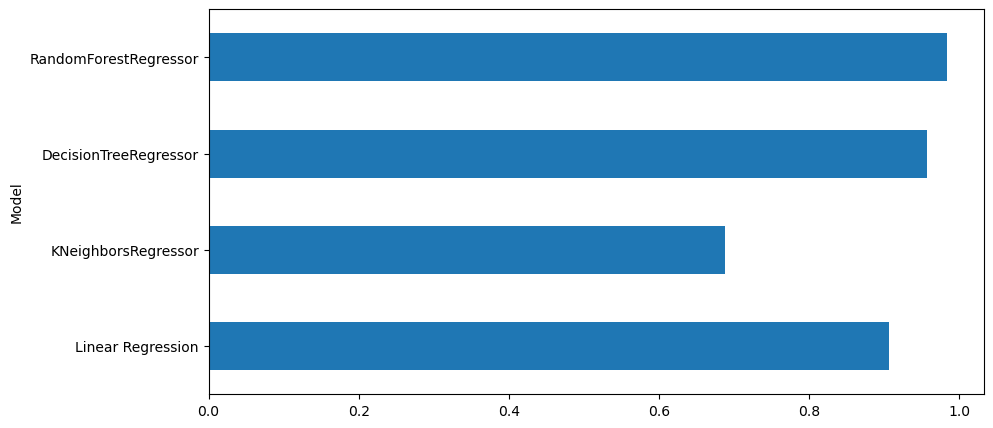

In [56]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(10, 5))

Практически все модели показали очень хороший результат, лучшей является RandomForestRegressor, но возможно на ней все же произошло переобучение, так что лучшей я бы все же назвала DecisionTreeRegressor, и у линейной регрессии тоже очень хороший результат. 

### Обучение моделей на масштабированных данных

Масштабирование данных я применю для всех моделей кроме RandomForestRegressor, во-первых, потому что для него масштабирование необязательно, во-вторых, он уже показывает сильно хороший результат.

## Нормализация

In [58]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [61]:
X_train_norm = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_train_norm.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
count,210107.000000,210107.000000,210107.000000,210107.000000,210107.000000,210107.000000,210107.000000,210107.000000,210107.000000
mean,0.621558,0.515579,0.482995,0.462122,0.615605,0.517652,0.311413,0.232286,0.521451
std,0.366751,0.350278,0.350663,0.199052,0.348296,0.349039,0.463072,0.146702,0.282672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.200000,0.500000,0.400000,0.200000,0.000000,0.120816,0.291667
50%,0.600000,0.400000,0.400000,0.500000,0.800000,0.600000,0.000000,0.212653,0.520833
75%,1.000000,0.800000,0.800000,0.500000,1.000000,0.800000,1.000000,0.313061,0.770833
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
X_test_norm = pd.DataFrame(mms.transform(X_test), columns=X_train.columns)
X_test_norm.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
count,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000,90046.000000
mean,0.619614,0.515377,0.484570,0.462236,0.612978,0.517680,0.311585,0.232900,0.519722
std,0.366423,0.350527,0.351303,0.199055,0.348416,0.348607,0.463144,0.146947,0.282166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.200000,0.500000,0.400000,0.200000,0.000000,0.122449,0.270833
50%,0.600000,0.400000,0.400000,0.500000,0.800000,0.600000,0.000000,0.212653,0.520833
75%,1.000000,0.800000,0.800000,0.500000,1.000000,0.800000,1.000000,0.313061,0.770833
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.957551,1.000000


Теперь диапазон значений min = 0, max = 1

In [63]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [65]:
from sklearn.metrics import r2_score
pred_train = knn.predict(X_train_norm)
pred_test = knn.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.98
Test R2 0.97


In [66]:
results_df3 = pd.DataFrame(data=[["KNeighborsRegressor", metrics.r2_score(y_test, pred_test)]], 
                          columns=['Model', 'R2 score norm'])

На масштабированных данных результат стал гораздо выше, чем был до этого.

In [67]:
tree_1.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [68]:
pred_train = tree_1.predict(X_train_norm)
pred_test = tree_1.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.96
Test R2 0.96


In [69]:
results_df33 = pd.DataFrame(data=[["DecisionTreeRegressor", metrics.r2_score(y_test, pred_test)]], 
                          columns=['Model', 'R2 score norm'])
results_df3  = pd.concat([results_df3, results_df33], ignore_index=True)

Для этой модели данных результат стал немного выше с 0.95 до 0.96.

In [70]:
lrm.fit(X_train_norm, y_train)

LinearRegression()

In [71]:
pred_train = lrm.predict(X_train_norm)
pred_test = lrm.predict(X_test_norm)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.91
Test R2 0.91


In [72]:
results_df33 = pd.DataFrame(data=[["Linear Regression", metrics.r2_score(y_test, pred_test)]], 
                          columns=['Model', 'R2 score norm'])
results_df3  = pd.concat([results_df3, results_df33], ignore_index=True)

Для модели линейной регресси результат тоже стал слегка выше с 0.90 до 0.91

In [74]:
results_df3 

,Model,R2 score norm
0,KNeighborsRegressor,0.971016
1,DecisionTreeRegressor,0.957397
2,Linear Regression,0.906421


In [75]:
results = pd.merge(results_df, results_df3, on='Model')
results

,Model,MAE,MSE,RMSE,R2 Square,R2 score norm
0,Linear Regression,4531.822372,4.816193e+07,6939.879903,0.906421,0.906421
1,KNeighborsRegressor,8804.259814,1.603569e+08,12663.208644,0.688426,0.971016
2,DecisionTreeRegressor,2660.099649,2.192579e+07,4682.497962,0.957398,0.957397


В предыдущем результате, при выводе R2 Square значения округлялись, здесь без округления уже можно увидеть, что после нормализации Linear Regression и 	DecisionTreeRegressor не изменились, а вот KNeighborsRegressor стала значительно лучше. 

## Стандартизация

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [80]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_train_std.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
count,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05
mean,2.938796e-17,4.267849e-17,4.795412e-17,4.606030e-17,1.049377e-16,1.189384e-16,7.135627e-18,-3.395341e-17,-1.352725e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.694772e+00,-1.471916e+00,-1.377379e+00,-2.321613e+00,-1.767483e+00,-1.483084e+00,-6.724945e-01,-1.583389e+00,-1.844726e+00
25%,-1.149441e+00,-9.009402e-01,-8.070298e-01,1.902936e-01,-6.190310e-01,-9.100801e-01,-6.724945e-01,-7.598371e-01,-8.129034e-01
50%,-5.878006e-02,-3.299646e-01,-2.366804e-01,1.902936e-01,5.294208e-01,2.359273e-01,-6.724945e-01,-1.338261e-01,-2.185368e-03
75%,1.031881e+00,8.119868e-01,9.040186e-01,1.902936e-01,1.103647e+00,8.089310e-01,1.487001e+00,5.506127e-01,8.822343e-01
max,1.031881e+00,1.382962e+00,1.474368e+00,2.702200e+00,1.103647e+00,1.381935e+00,1.487001e+00,5.233176e+00,1.692952e+00


In [81]:
X_train_std.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
count,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05,2.101070e+05
mean,2.938796e-17,4.267849e-17,4.795412e-17,4.606030e-17,1.049377e-16,1.189384e-16,7.135627e-18,-3.395341e-17,-1.352725e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.694772e+00,-1.471916e+00,-1.377379e+00,-2.321613e+00,-1.767483e+00,-1.483084e+00,-6.724945e-01,-1.583389e+00,-1.844726e+00
25%,-1.149441e+00,-9.009402e-01,-8.070298e-01,1.902936e-01,-6.190310e-01,-9.100801e-01,-6.724945e-01,-7.598371e-01,-8.129034e-01
50%,-5.878006e-02,-3.299646e-01,-2.366804e-01,1.902936e-01,5.294208e-01,2.359273e-01,-6.724945e-01,-1.338261e-01,-2.185368e-03
75%,1.031881e+00,8.119868e-01,9.040186e-01,1.902936e-01,1.103647e+00,8.089310e-01,1.487001e+00,5.506127e-01,8.822343e-01
max,1.031881e+00,1.382962e+00,1.474368e+00,2.702200e+00,1.103647e+00,1.381935e+00,1.487001e+00,5.233176e+00,1.692952e+00


Теперь результат mean = 0, std = 1

## Обучение моделей на масштабированных данных

In [83]:
knn.fit(X_train_std, y_train)

KNeighborsRegressor()

In [84]:
pred_train = knn.predict(X_train_std)
pred_test = knn.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Train R2 0.98
Test R2 0.97


In [85]:
results_df4 = pd.DataFrame(data=[["KNeighborsRegressor", metrics.r2_score(y_test, pred_test)]], 
                          columns=['Model', 'R2 score stand'])

Данная модель стала на пару тысячных лучше, чем с использованием нормализации.

In [86]:
tree_1.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=9, random_state=1)

In [87]:
pred_train = tree_1.predict(X_train_std)
pred_test = tree_1.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.96
Test R2 0.96


C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [88]:
results_df44 = pd.DataFrame(data=[["DecisionTreeRegressor", metrics.r2_score(y_test, pred_test)]], 
                          columns=['Model', 'R2 score stand'])
results_df4  = pd.concat([results_df4, results_df44], ignore_index=True)

Эта модель не изменилась.

In [89]:
lrm.fit(X_train_std, y_train)

LinearRegression()

In [90]:
pred_train = lrm.predict(X_train_std)
pred_test = lrm.predict(X_test_std)

print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

Train R2 0.91
Test R2 0.91


C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Эта модель тоже не изменилась.

In [91]:
results_df44 = pd.DataFrame(data=[["Linear Regression", metrics.r2_score(y_test, pred_test)]], 
                          columns=['Model', 'R2 score stand'])
results_df4  = pd.concat([results_df4, results_df44], ignore_index=True)

In [92]:
results_df4 

,Model,R2 score stand
0,KNeighborsRegressor,0.972985
1,DecisionTreeRegressor,0.957397
2,Linear Regression,0.906421


In [93]:
results = pd.merge(results, results_df4, on='Model')
results

,Model,MAE,MSE,RMSE,R2 Square,R2 score norm,R2 score stand
0,Linear Regression,4531.822372,4.816193e+07,6939.879903,0.906421,0.906421,0.906421
1,KNeighborsRegressor,8804.259814,1.603569e+08,12663.208644,0.688426,0.971016,0.972985
2,DecisionTreeRegressor,2660.099649,2.192579e+07,4682.497962,0.957398,0.957397,0.957397


После масштабирования 2 способами можно увидеть, что они повлияли только на модель KNeighborsRegressor, при чем самый лучший ее результат именно при стандартизации. В другом 	DecisionTreeRegressor наоборот ухудшилась с 0.957398 до 0.957397. Как итог на данный момент все модели представляют очень хороший результат, но все же самый наилучший результат был у модели : RandomForestRegressor, самое лучшее значение по R2 Square и аналогично самое меньшее количество единиц неправильных ответов.   